## Dataset 1: Spam–Ham Dataset

Dataset 1 contains messages labeled as **spam** or **ham (non-spam)** and is used for training and testing spam detection models.


## Import Libraries and Dataset

In [ ]:
# Import libraries for data handling and numerical operations
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning

In [ ]:
# Drop columns Unnamed 2, Unnamed 3 and Unnamed 4
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Missing values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
# Check for Duplicate values
df.duplicated().sum()

np.int64(403)

In [ ]:
# Remove Duplicate values
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape


(5169, 2)

In [ ]:
# Renaming the Columns
df.rename(columns={'v1': 'Category' , 'v2': 'Message'}, inplace=True)

In [ ]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Message   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [ ]:
df['Category']=encoder.fit_transform(df ['Category'])

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5169, 2)

In [ ]:
df['Category'].value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

EDA is performed to analyze text characteristics such as email length, number of words, and number of sentences in spam and ham emails.


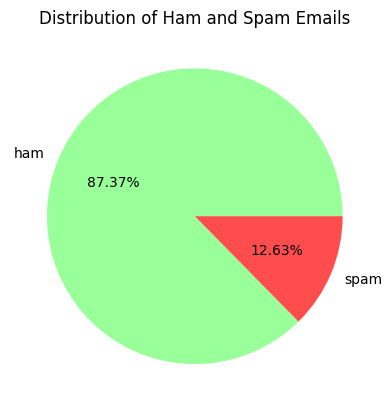

In [ ]:
# Import library for visualization (EDA)
import matplotlib.pyplot as plt

# Count the number of ham and spam emails
counts = df['Category'].value_counts()

# Visualize class distribution using a pie chart
plt.pie(
    counts,
    labels=['ham', 'spam'],
    autopct='%0.2f%%',
    colors=['#99ff99', '#ff4d4d']
)

# Title for EDA visualization
plt.title('Distribution of Ham and Spam Emails')

# Display the plot
plt.show()


In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saves\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_char'] = df['Message'].apply(len)

In [ ]:
df.head()

,Category,Message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saves\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\saves\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))


In [ ]:
df.head()

,Category,Message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Category,Message,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df.groupby('Category')[['num_char', 'num_words', 'num_sentences']].describe()


num_char                                                           \
            count        mean        std   min    25%    50%    75%    max   
Category                                                                     
0          4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0   
1           653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0   

         num_words             ...              num_sentences            \
             count       mean  ...   75%    max         count      mean   
Category                       ...                                        
0           4516.0  17.123782  ...  22.0  220.0        4516.0  1.820195   
1            653.0  27.667688  ...  32.0   46.0         653.0  2.970904   

                                              
               std  min  25%  50%  75%   max  
Category                                      
0         1.383657  1.0  1.0  1.0  2.0  38.0  
1         1.488425  1.0  2.0  3.0  4.0   9.0  

[2 rows x 24 columns]

In [ ]:
df[df['Category'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Category'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


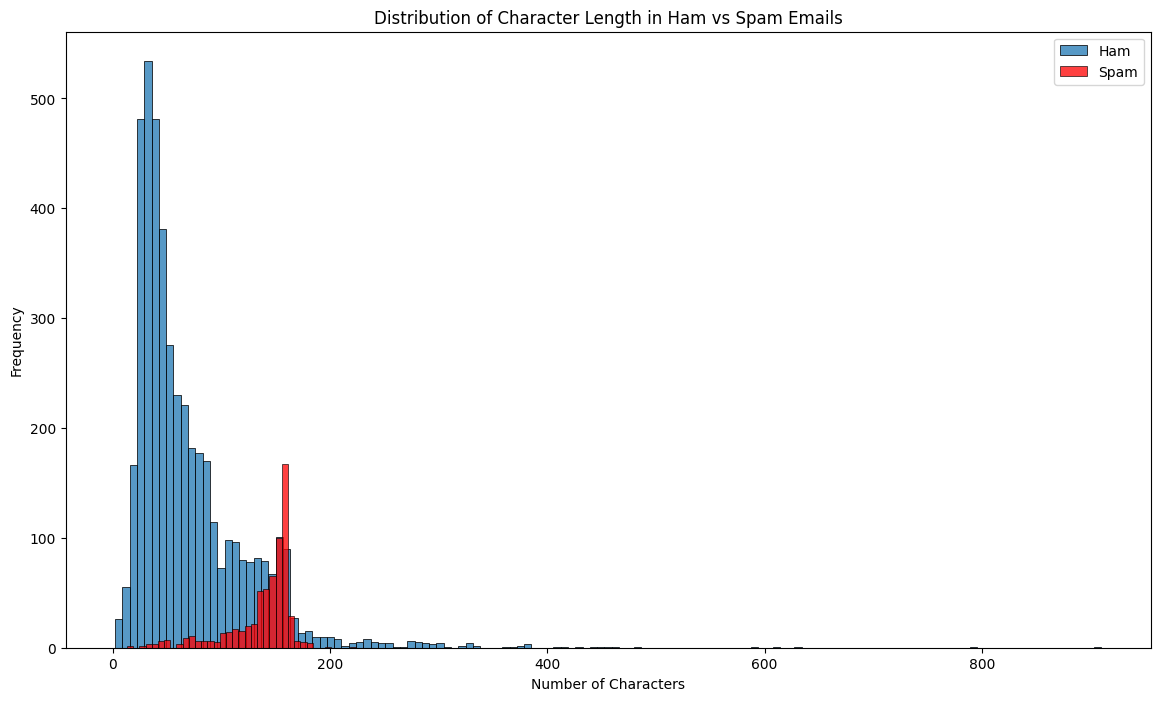

In [ ]:
# Import seaborn for statistical data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(14, 8))

# Histogram of character count for ham emails (Category = 0)
sns.histplot(df[df['Category'] == 0]['num_char'], label='Ham')

# Histogram of character count for spam emails (Category = 1)
sns.histplot(df[df['Category'] == 1]['num_char'], color='red', label='Spam')

# Add legend to differentiate ham and spam
plt.legend()

# Add title and axis labels
plt.title('Distribution of Character Length in Ham vs Spam Emails')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Display the plot
plt.show()


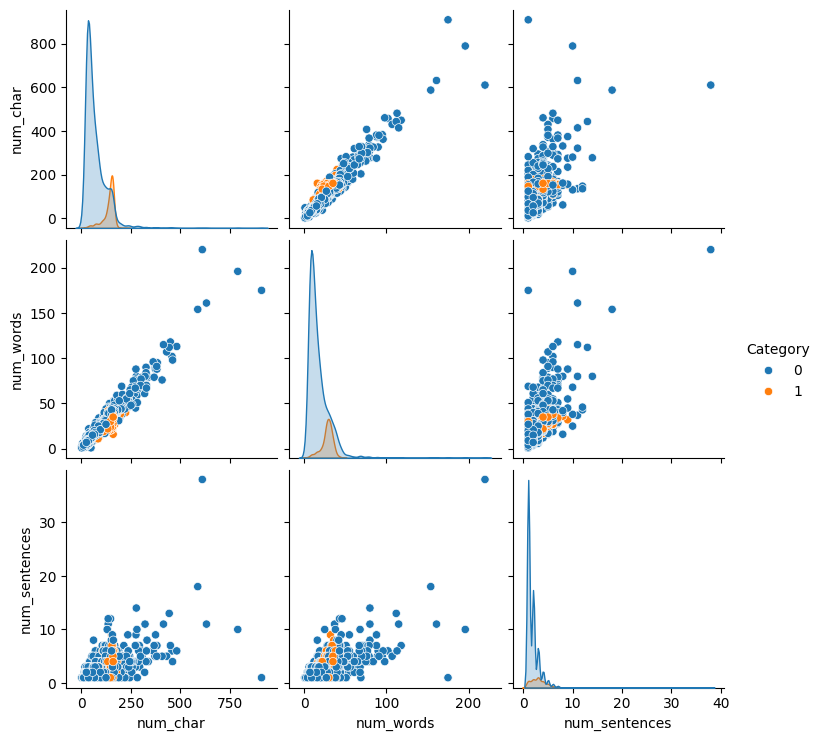

In [ ]:
sns.pairplot(df, hue='Category')

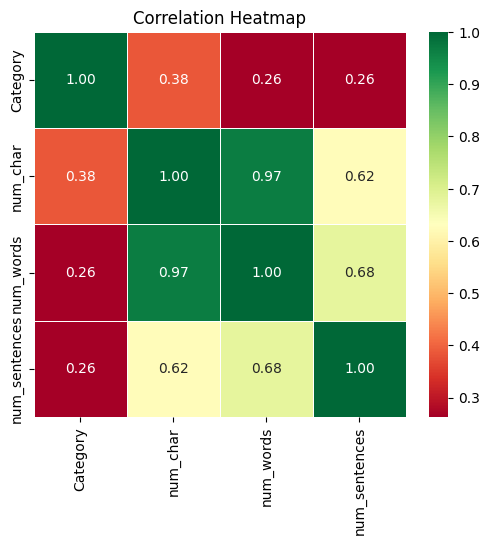

In [ ]:
# Set figure size for the heatmap
plt.figure(figsize=(6, 5))

# Plot correlation heatmap for numerical features
sns.heatmap(
    df.corr(numeric_only=True),  # compute correlation between numeric columns
    annot=True,                  # display correlation values
    cmap='RdYlGn',               # color map
    fmt='.2f',                   # format values to 2 decimal places
    linewidths=0.5               # line width between cells
)

# Add title to the heatmap
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


## Data Preprocessing

In [ ]:
# Import required NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Function to preprocess email text
def transform_text(Message):
    
    # Convert text to lowercase
    Message = Message.lower()
    
    # Tokenize the text into words
    words = nltk.word_tokenize(Message)
    
    # Initialize stemmer and stopwords
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    processed_words = []
    
    # Process each word
    for word in words:
        # Keep only alphanumeric words and remove stopwords
        if word.isalnum() and word not in stop_words:
            # Apply stemming
            processed_words.append(ps.stem(word))
    
    # Join processed words back into a single string
    return " ".join(processed_words)


In [ ]:
df['Message'][432]

'Congrats! Nokia 3650 video camera phone is your Call 09066382422 Calls cost 150ppm Ave call 3mins vary from mobiles 16+ Close 300603 post BCM4284 Ldn WC1N3XX'

In [ ]:
transform_text("Congrats! Nokia 3650 video camera phone is your Call 09066382422 Calls cost 150ppm Ave call 3mins vary from mobiles 16+ Close 300603 post BCM4284 Ldn WC1N3XX")

'congrat nokia 3650 video camera phone call 09066382422 call cost 150ppm ave call 3min vari mobil close 300603 post bcm4284 ldn wc1n3xx'

In [ ]:
df['transformed_Message'] = df['Message'].apply(transform_text)

In [ ]:
df.head()

,Category,Message,num_char,num_words,num_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Word Cloud Analysis (EDA)

Word cloud is used to visualize the most frequent words appearing in spam emails.


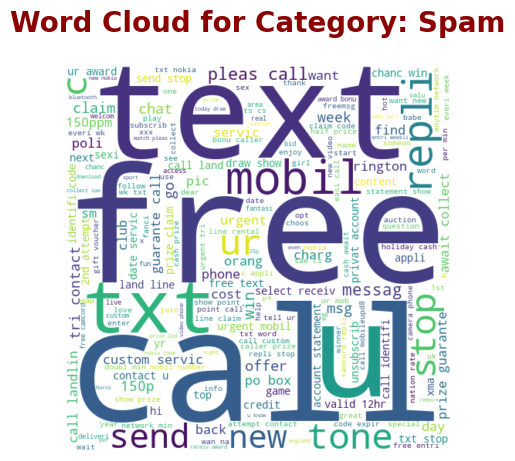

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all spam messages into one string
spam_text = df[df['Category'] == 1]['transformed_Message'].dropna().str.cat(sep=' ')

# Create WordCloud object
wc = WordCloud(
    width=500,
    height=500,
    min_font_size=5,
    background_color='white'
)

# Generate word cloud
spam_wc = wc.generate(spam_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')

plt.title(
    'Word Cloud for Category: Spam',
    fontsize=20,
    fontweight='bold',
    color='darkred',
    pad=25          
)

plt.axis('off')
plt.show()



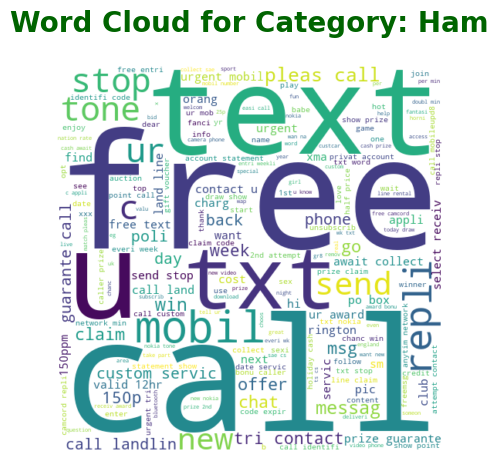

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all spam messages into one string
ham_text = df[df['Category'] == 0]['transformed_Message'].dropna().str.cat(sep=' ')

# Create WordCloud object
wc = WordCloud(
    width=500,
    height=500,
    min_font_size=5,
    background_color='white'
)

# Generate word cloud
ham_wc = wc.generate(ham_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')

plt.title(
    'Word Cloud for Category: Ham',
    fontsize=20,
    fontweight='bold',
    color='darkgreen',
    pad=25        
)

plt.axis('off')
plt.show()


Top 20 Most Common Spam Words


,Spam Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


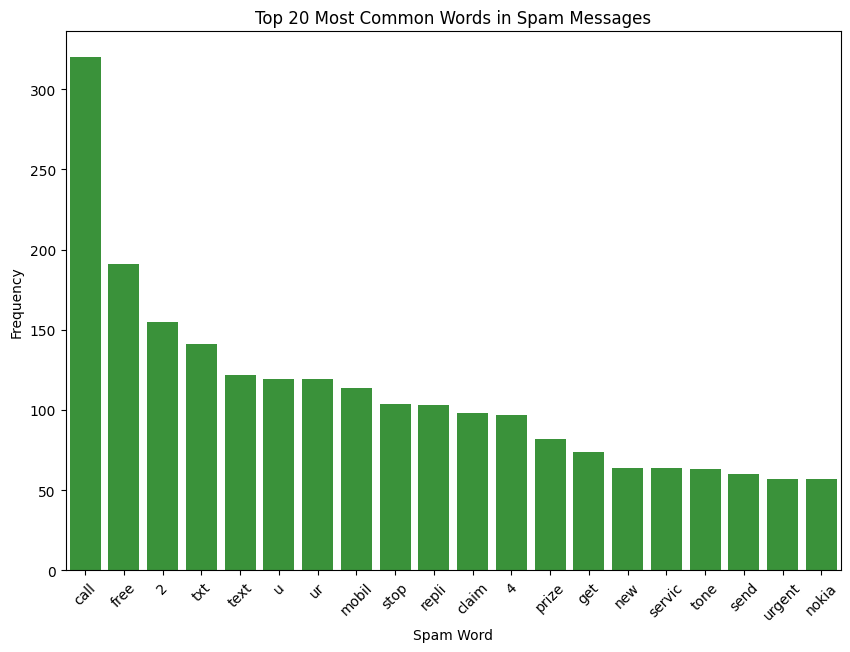

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Create spam corpus
# -------------------------------
spam_corpus = []

for msg in df[df['Category'] == 1]['transformed_Message'].dropna():
    for word in msg.split():
        spam_corpus.append(word)

# -------------------------------
# Get Top 20 most common spam words
# -------------------------------
spam_top20 = pd.DataFrame(
    Counter(spam_corpus).most_common(20),
    columns=['Spam Word', 'Count']
)

# -------------------------------
# Display table (Top 20)
# -------------------------------
print("Top 20 Most Common Spam Words")
display(spam_top20)

# -------------------------------
# Plot bar chart (Top 20)
# -------------------------------
plt.figure(figsize=(10, 7))
sns.barplot(
    x='Spam Word',
    y='Count',
    data=spam_top20,
    color='#2ca02c'   # pleasant green
)

plt.title('Top 20 Most Common Words in Spam Messages')
plt.xticks(rotation=45)
plt.xlabel('Spam Word')
plt.ylabel('Frequency')
plt.show()


Top 20 Most Common Ham Words


,Ham Word,Count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


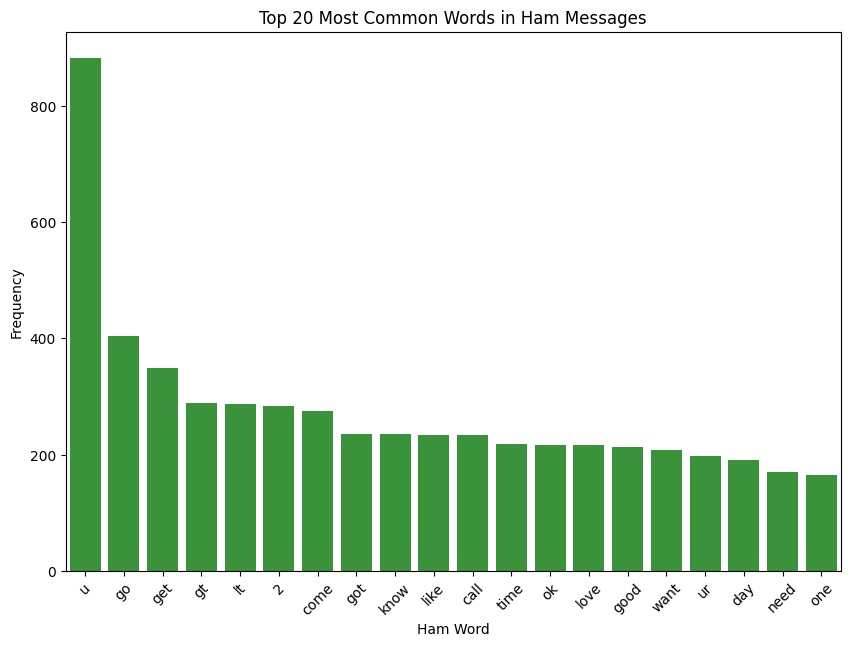

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Create ham corpus
# -------------------------------
ham_corpus = []

for msg in df[df['Category'] == 0]['transformed_Message'].dropna():
    for word in msg.split():
        ham_corpus.append(word)

# -------------------------------
# Get Top 20 most common ham words
# -------------------------------
ham_top20 = pd.DataFrame(
    Counter(ham_corpus).most_common(20),
    columns=['Ham Word', 'Count']
)

# -------------------------------
# Display table (Top 20)
# -------------------------------
print("Top 20 Most Common Ham Words")
display(ham_top20)

# -------------------------------
# Plot bar chart (Top 20)
# -------------------------------
plt.figure(figsize=(10, 7))
sns.barplot(
    x='Ham Word',
    y='Count',
    data=ham_top20,
    color='#2ca02c'   # pleasant green
)

plt.title('Top 20 Most Common Words in Ham Messages')
plt.xticks(rotation=45)
plt.xlabel('Ham Word')
plt.ylabel('Frequency')
plt.show()


## Data Vectorization and Model Building

## Feature Extraction using TF-IDF

TF-IDF is used to convert preprocessed email text into numerical features for machine learning models.


In [ ]:
# Import TF-IDF vectorizer for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
# max_features limits vocabulary size
# max_df ignores very frequent words
tfidf = TfidfVectorizer(max_features=3000, max_df=0.7)

# Fit and transform the preprocessed email text
x = tfidf.fit_transform(df['transformed_Message'])

# Store target labels (spam = 1, ham = 0)
y = df['Category'].values


## Train–Test Split

The dataset is divided into training and testing sets to evaluate model performance on unseen data.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## Model Evaluation


Multinomial Naive Bayes
Accuracy : 0.9709864603481625
Precision: 1.0
Recall   : 0.782608695652174
F1-score : 0.8780487804878049
Confusion Matrix:
[[896   0]
 [ 30 108]]


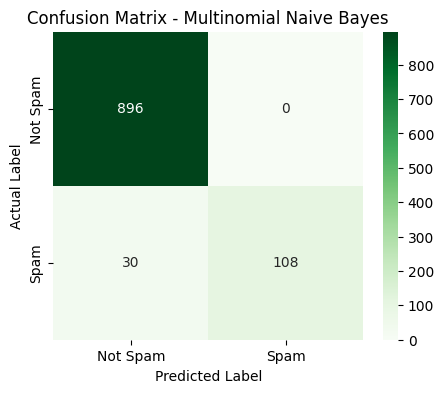


Logistic Regression
Accuracy : 0.9526112185686654
Precision: 0.978494623655914
Recall   : 0.6594202898550725
F1-score : 0.7878787878787878
Confusion Matrix:
[[894   2]
 [ 47  91]]


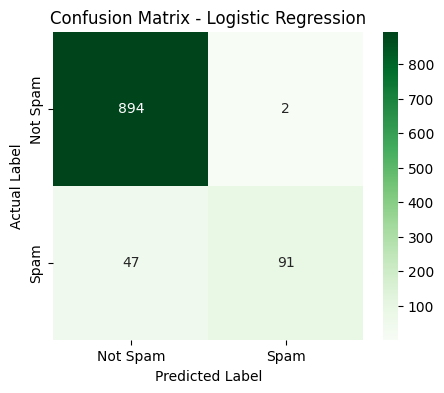


Linear SVC
Accuracy : 0.9777562862669246
Precision: 0.967479674796748
Recall   : 0.8623188405797102
F1-score : 0.9118773946360154
Confusion Matrix:
[[892   4]
 [ 19 119]]


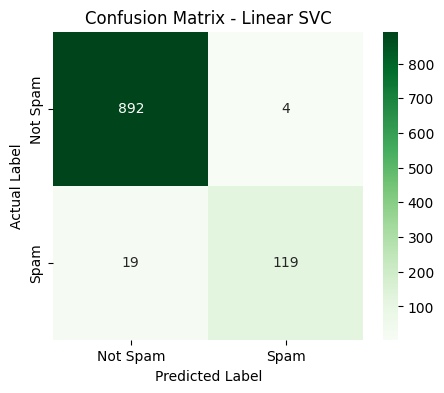


Final Model Comparison Table:


,Algorithm,Accuracy,Precision,Recall,F1-score
0,Multinomial Naive Bayes,0.9710,1.0000,0.7826,0.8780
1,Logistic Regression,0.9526,0.9785,0.6594,0.7879
2,Linear SVC,0.9778,0.9675,0.8623,0.9119


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Define models
# -----------------------------
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": LinearSVC()
}

# -----------------------------
# List to store results for table
# -----------------------------
results = []

# -----------------------------
# Train, Predict, Evaluate
# -----------------------------
for name, model in models.items():
    print("\n==============================")
    print(name)
    print("==============================")
    
    # Train
    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    print("Confusion Matrix:")
    print(cm)
    
    # Save results for table
    results.append({
        "Algorithm": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-score": round(f1, 4)
    })
    
    # -----------------------------
    # Plot Confusion Matrix
    # -----------------------------
    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Greens',
        xticklabels=['Not Spam', 'Spam'],
        yticklabels=['Not Spam', 'Spam']
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# -----------------------------
# Display Final Result Table
# -----------------------------
results_df = pd.DataFrame(results)
print("\nFinal Model Comparison Table:")
display(results_df)


## -------- End of Dataset 1 Implementation --------

## =====================================================
## DATASET 2: Enron SpamSubset Dataset Implementation
## This dataset represents real-world email data.
## Models are trained and tested again to examine
## robustness and generalization in practical scenarios.
## =====================================================

In [ ]:
# Import required libraries for data handling and numerical operations
import pandas as pd
import numpy as np

In [ ]:
# Load the Enron spam subset dataset from CSV file
df = pd.read_csv('enronSpamSubset.csv')

In [ ]:
# Display the first few records of the dataset to understand its structure
df.head()

,Unnamed: 0.1,Unnamed: 0,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [ ]:
# Display dataset information such as column names, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  10000 non-null  int64 
 1   Unnamed: 0    10000 non-null  int64 
 2   Body          10000 non-null  object
 3   Label         10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


## Data Cleaning

In [ ]:
# Drop unwanted index columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [ ]:
# Rename columns
df = df.rename(columns={
    'Body': 'Message',
    'Label': 'Category'
})

In [ ]:
df.head()

,Message,Category
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Message   10000 non-null  object
 1   Category  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [ ]:
# Check missing values
df.isnull().sum()

Message     0
Category    0
dtype: int64

In [ ]:
# Check duplicate emails
df.duplicated().sum()

np.int64(313)

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Category'].value_counts()

Category
0    4927
1    4760
Name: count, dtype: int64

In [ ]:
df['Category'].unique()

array([1, 0])

## Exploratory Data Analysis (EDA)


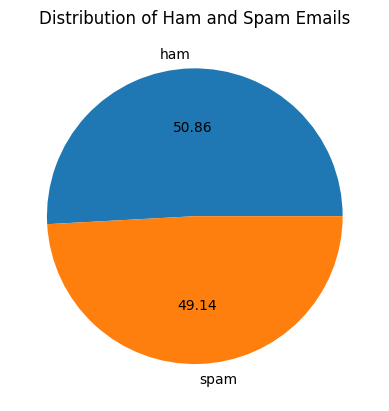

In [ ]:
# Import library for data visualization
import matplotlib.pyplot as plt

# Analyze class distribution in the dataset
counts = df['Category'].value_counts()

# Visualize the distribution of ham and spam emails
plt.pie(counts, labels=['ham', 'spam'], autopct='%0.2f')
plt.title('Distribution of Ham and Spam Emails')
plt.show()

## Data Preprocessing

In [ ]:
# Import libraries required for text preprocessing
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import re

# This block preprocesses raw email text.
# It removes URLs and special characters,
# converts text to lowercase, tokenizes words,
# removes stopwords, applies stemming,
# and returns cleaned text for feature extraction.
def transform_text(Message):
    # Remove URLs
    Message = re.sub(r'http\S+|www\S+', ' ', Message)
    
    # Remove special characters and digits
    Message = re.sub(r'[^a-zA-Z\s]', ' ', Message)
    
    # Convert text to lowercase
    Message = Message.lower()
    
    # Tokenize text into words
    words = nltk.word_tokenize(Message)
    
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    processed_words = []
    for word in words:
        if word not in stop_words:
            processed_words.append(ps.stem(word))

    return " ".join(processed_words)


In [ ]:
df['transformed_Message'] = df['Message'].apply(transform_text)
df[['Message', 'transformed_Message']].head()

,Message,transformed_Message
0,Subject: stock promo mover : cwtd\n * * * urge...,subject stock promo mover cwtd urgent investor...
1,Subject: are you listed in major search engine...,subject list major search engin submit websit ...
2,"Subject: important information thu , 30 jun 20...",subject import inform thu jun subject import i...
3,Subject: = ? utf - 8 ? q ? bask your life with...,subject utf q bask life utf q individu increme...
4,"Subject: "" bidstogo "" is places to go , things...",subject bidstogo place go thing hello privaci ...


## Feature Extraction using TF-IDF


In [ ]:
# Import TF-IDF vectorizer for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer with limited features
tfidf = TfidfVectorizer(
    max_features=3000,
    stop_words='english'
)

# Convert preprocessed text into numerical feature vectors
x = tfidf.fit_transform(df['transformed_Message'])

# Target labels (spam or ham)
y = df['Category']


In [ ]:
print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (9687, 3000)
y shape: (9687,)


## Train–Test Split

In [ ]:
# Split the dataset into training and testing sets
# 80% of data is used for training and 20% for testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(7749, 3000) (1938, 3000)
(7749,) (1938,)


## Model Training and Evaluation


Multinomial Naive Bayes
Accuracy : 0.97781217750258
Precision: 0.9702564102564103
Recall   : 0.9854166666666667
F1-score : 0.9777777777777777


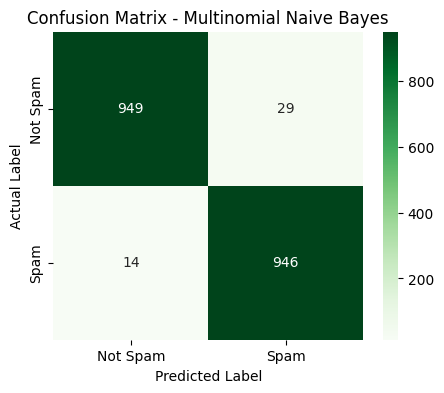


Logistic Regression
Accuracy : 0.9793601651186791
Precision: 0.9703476482617587
Recall   : 0.9885416666666667
F1-score : 0.9793601651186791


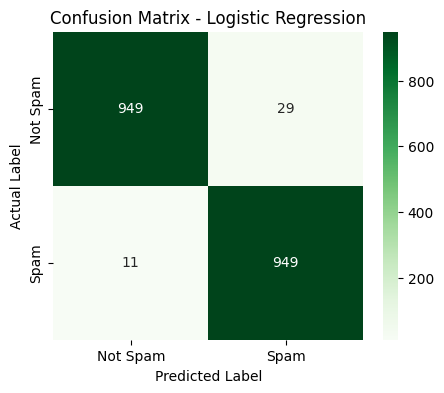


Linear SVC
Accuracy : 0.9834881320949432
Precision: 0.9813278008298755
Recall   : 0.9854166666666667
F1-score : 0.9833679833679834


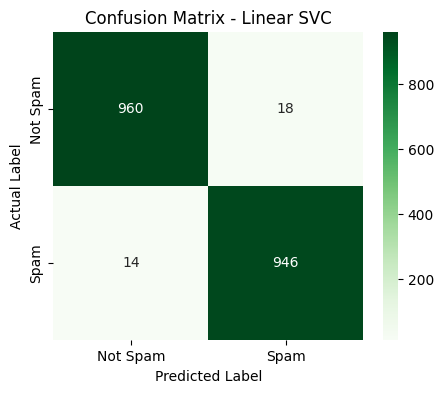

,Algorithm,Accuracy,Precision,Recall,F1-score
0,Multinomial Naive Bayes,0.9778,0.9703,0.9854,0.9778
1,Logistic Regression,0.9794,0.9703,0.9885,0.9794
2,Linear SVC,0.9835,0.9813,0.9854,0.9834


In [ ]:
# Import machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Import libraries for visualization and result storage
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------------------------
# Define machine learning models
# -------------------------------------------------
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": LinearSVC()
}

# -------------------------------------------------
# Train, test, and evaluate each model
# -------------------------------------------------
results = []

for name, model in models.items():
    print("\n==============================")
    print(name)
    print("==============================")
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results.append({
        "Algorithm": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-score": round(f1, 4)
    })
    
    # Display metrics
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    
    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Greens',
        xticklabels=['Not Spam', 'Spam'],
        yticklabels=['Not Spam', 'Spam']
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# -------------------------------------------------
# Final comparison of all models
# -------------------------------------------------
results_df = pd.DataFrame(results)
display(results_df)
